<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Obtaining_the_Efficient_Frontier_Yahoo_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaining the Efficient Frontier

In [1]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

tickers_list = ['MSFT', 'AAPL']

# Fetch the data
import yfinance as yf
sec_data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(sec_data.head())

[*********************100%%**********************]  2 of 2 completed
                 AAPL       MSFT
Date                            
2015-01-02  24.466450  40.452740
2015-01-05  23.777191  40.080738
2015-01-06  23.779423  39.492462
2015-01-07  24.112871  39.994225
2015-01-08  25.039341  41.170780


In [3]:
print(sec_data.tail())

                  AAPL        MSFT
Date                              
2023-12-07  194.270004  370.950012
2023-12-08  195.710007  374.230011
2023-12-11  193.179993  371.299988
2023-12-12  194.710007  374.380005
2023-12-13  196.660004  373.579987


Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe.

<Axes: xlabel='Date'>

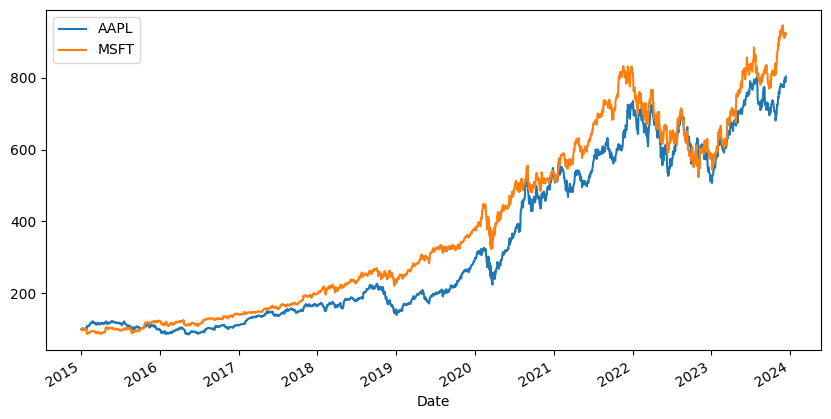

In [4]:
(sec_data / sec_data.iloc[0] * 100).plot(figsize=(10, 5))

Calculate their logarithmic returns.

In [5]:
log_returns = np.log(sec_data / sec_data.shift(1))

Create a variable that carries the number of assets in your portfolio.

In [6]:
num_assets = len(tickers_list)
num_assets

2

The portfolio need not be equally weighted. So, create a variable, called “weights”. Let it contain as many randomly generated values as there are assets in your portfolio. Don’t forget these values should be neither smaller than 0 nor equal or greater than 1! <br />

*Hint: There is a specific NumPy function that allows you to generate such values. It is the one we used in the lecture - NumPy.random.random().*

In [7]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.19039157, 0.80960843])

Sum the obtained values to obtain 1 – summing up the weights to 100%!

In [8]:
weights[0] + weights[1]

1.0

In [9]:
#Now, estimate the expected Portfolio Return, Variance, and Volatility.
#Expected Portfolio Return:
np.sum(weights * log_returns.mean()) * 250

0.24384622671681247

In [10]:
#Expected Portfolio Variance:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.07085438221735268

In [11]:
#Expected Portfolio Volatility:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.266184864741316

In [12]:
#1) Create two empty lists. Name them pf_returns and pf_volatilites.
pfolio_returns = []
pfolio_volatilities = []

In [ ]:
#2) Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [13]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.23308733379777846,
  0.2411568109126786,
  0.23470161590490632,
  0.23879952128077309,
  0.23215556289238912,
  0.24598678130549156,
  0.23886883106571433,
  0.2355103804829197,
  0.23952608393477975,
  0.23876180866072533,
  0.23903706073039574,
  0.23463041078632416,
  0.23746365109521728,
  0.2405693529145566,
  0.2463921104544972,
  0.23648951583221145,
  0.2390462886047847,
  0.2345184368885443,
  0.23487222511711578,
  0.234473941680371,
  0.24022160102367862,
  0.23666332213785504,
  0.23767824248649194,
  0.23871087626216875,
  0.23210796875780965,
  0.2338991143812855,
  0.2428005180945555,
  0.23229314195905781,
  0.2394460629778628,
  0.24424406312582483,
  0.23661637228056334,
  0.24009544398857527,
  0.2400696968347223,
  0.23520044931001624,
  0.23749692261614067,
  0.2387744188962132,
  0.2348160720878057,
  0.24176815802835477,
  0.23517030975737752,
  0.24016392258699,
  0.24189678731450612,
  0.23909198804211507,
  0.23687400033200978,
  0.24354785210282714,
  0.2

In [ ]:
#3) Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays.

In [14]:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.23308733, 0.24115681, 0.23470162, 0.23879952, 0.23215556,
        0.24598678, 0.23886883, 0.23551038, 0.23952608, 0.23876181,
        0.23903706, 0.23463041, 0.23746365, 0.24056935, 0.24639211,
        0.23648952, 0.23904629, 0.23451844, 0.23487223, 0.23447394,
        0.2402216 , 0.23666332, 0.23767824, 0.23871088, 0.23210797,
        0.23389911, 0.24280052, 0.23229314, 0.23944606, 0.24424406,
        0.23661637, 0.24009544, 0.2400697 , 0.23520045, 0.23749692,
        0.23877442, 0.23481607, 0.24176816, 0.23517031, 0.24016392,
        0.24189679, 0.23909199, 0.236874  , 0.24354785, 0.24081904,
        0.23510253, 0.23525874, 0.24011857, 0.24658849, 0.24117792,
        0.23917309, 0.23744345, 0.23585755, 0.23834505, 0.23552135,
        0.23956933, 0.2384141 , 0.24306147, 0.24327019, 0.23433996,
        0.23728635, 0.23799164, 0.24328004, 0.23535175, 0.24157775,
        0.23404552, 0.23867452, 0.23883509, 0.2421583 , 0.24556501,
        0.24131093, 0.23825987, 0.23601836, 0.23

In [15]:
#Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities.
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [16]:
portfolios.head()

,Return,Volatility
0,0.233087,0.280121
1,0.241157,0.261374
2,0.234702,0.272589
3,0.238800,0.261776
4,0.232156,0.285230


Text(0, 0.5, 'Expected Return')

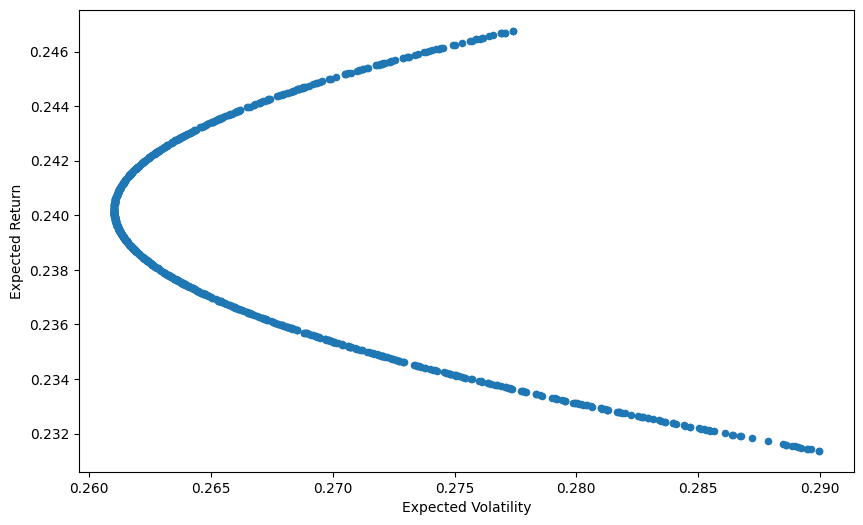

In [17]:
#Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return.
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')